In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout #to create CNN

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'C:/Users/HP/Desktop/Python/Train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [3]:
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
from keras.layers import BatchNormalization

input_shape = (30, 30, 3)

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())  
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization()) 

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())  
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization()) 

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [5]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=10 ,validation_data=(X_t2, y_t2))
model.save("my_model.keras")

Epoch 1/10
981/981 [==============================] - 75s 73ms/step - loss: 0.8407 - accuracy: 0.7788 - val_loss: 0.1211 - val_accuracy: 0.9691
Epoch 2/10
981/981 [==============================] - 72s 73ms/step - loss: 0.1372 - accuracy: 0.9604 - val_loss: 0.0595 - val_accuracy: 0.9833
Epoch 3/10
981/981 [==============================] - 72s 74ms/step - loss: 0.0836 - accuracy: 0.9755 - val_loss: 0.0439 - val_accuracy: 0.9860
Epoch 4/10
981/981 [==============================] - 65s 66ms/step - loss: 0.0668 - accuracy: 0.9794 - val_loss: 0.0353 - val_accuracy: 0.9902
Epoch 5/10
981/981 [==============================] - 67s 68ms/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0220 - val_accuracy: 0.9944
Epoch 6/10
981/981 [==============================] - 67s 68ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0238 - val_accuracy: 0.9935
Epoch 7/10
981/981 [==============================] - 64s 65ms/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0190 - val_accuracy:

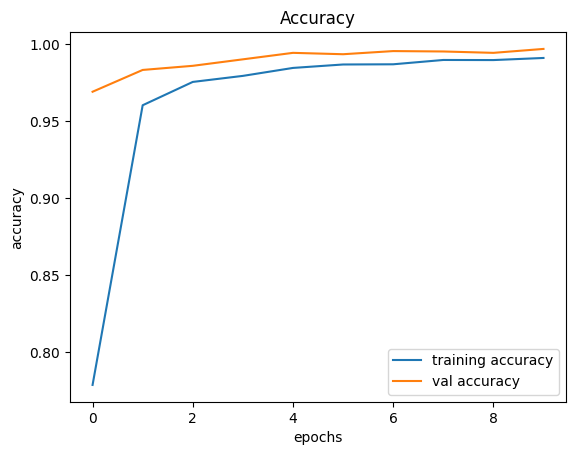

In [6]:
# Plotting accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


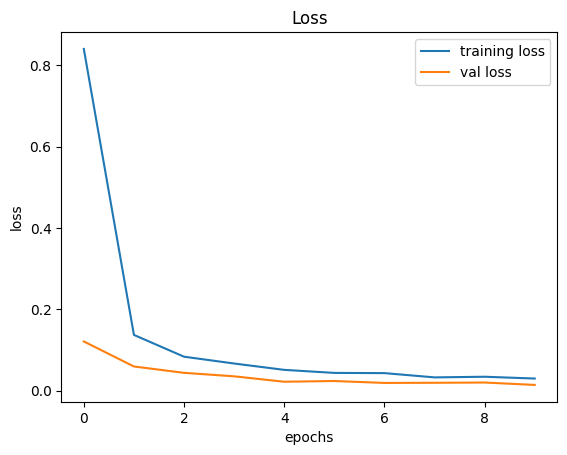

In [7]:
# Plotting loss
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Loading the test data
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []
for img in imgs:
   image = Image.open(img)
   image = image.resize((30, 30))
   data.append(np.array(image))
X_test = np.array(data)

# Predicting probabilities for each class
pred_probs = model.predict(X_test)

pred = np.argmax(pred_probs, axis=1)

# Calculating accuracy
accuracy = accuracy_score(labels, pred)
print(f'Accuracy: {accuracy}')

model.save('traffic_classifier.keras')


395/395 [==============================] - 8s 18ms/step
Accuracy: 0.9768012668250198


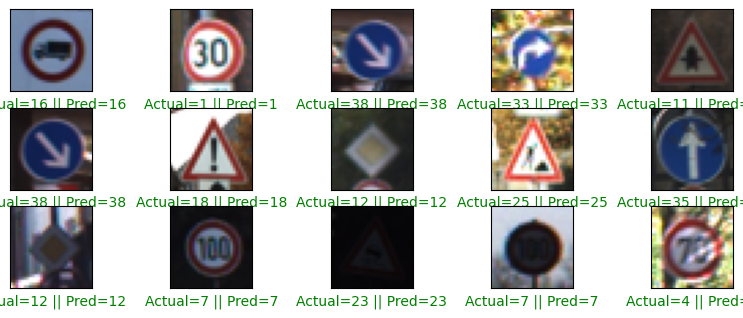

In [9]:
plt.figure(figsize = (10, 10))

start_index = 0
for i in range(15):
    plt.subplot(8, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()